
<h1 style="font-size:30px;">A) Preparing the data</h1>


<h1 style="font-size:15px;">Loading the data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
#I will define "x = df.iloc[:, :-1].values" and "y = df.iloc[:, -1]" for the decision tree after "Preparing the data".

In [3]:
df.head() #.head() -> gives us the first 5 rows, with all the columns.

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,severe,145,233,True,0,150,no,2.3,0,0,normal,yes
1,1,37,male,medium,130,250,False,1,187,no,3.5,0,0,fixed_defect,yes
2,2,41,female,weak,130,204,False,0,172,no,1.4,2,0,fixed_defect,yes
3,3,56,male,weak,120,236,False,1,178,no,0.8,2,0,fixed_defect,yes
4,4,57,female,none,120,354,False,1,163,yes,0.6,2,0,fixed_defect,yes



<h1 style="font-size:15px;">Encoding the data</h1>

In [4]:
#I use "LabelEncoder" to encode the data; i.e. change the data to catagorial.
#in order to do so, first I check the many and kind of distinctive classes each feature has by ".unique()" and "np.nuinque()" method.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [5]:
#first, the string/boolean columns:

# np.unique(df['sex'])
# df['sex'].nunique() #'sex' has 2 classes. so we encode it.

# np.unique(df['cp'])
# df['cp'].nunique() #'cp' has 4 classes. so we encode it.

# np.unique(df['fbs'])
# df['fbs'].nunique() #'fbs' has 2 classes. so we encode it.

# np.unique(df['exang'])
# df['exang'].nunique() #'exang' has 2 classes. so we encode it.

# np.unique(df['thal'])
# df['thal'].nunique() #'thal' has 3 classes. so we encode it.

np.unique(df['target'])
# df['target'].nunique() #'target' has 2 classes. so we encode it.


array(['no', 'yes'], dtype=object)

In [6]:
df['sex'] = le.fit_transform(df['sex'])

df['cp'] = le.fit_transform(df['cp'])

df['fbs'] = le.fit_transform(df['fbs'])

df['exang'] = le.fit_transform(df['exang'])

df['thal'] = le.fit_transform(df['thal'])

df['target'] = le.fit_transform(df['target'])

In [7]:
#just to see that the encoding works:
np.unique(df['target']) 

array([0, 1])

In [8]:
df.head(5) #as we see bellow, the string/boolean columns are encoded, and are now converted to digits.

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,2,145,233,1,0,150,0,2.3,0,0,2,1
1,1,37,1,0,130,250,0,1,187,0,3.5,0,0,1,1
2,2,41,0,3,130,204,0,0,172,0,1.4,2,0,1,1
3,3,56,1,3,120,236,0,1,178,0,0.8,2,0,1,1
4,4,57,0,1,120,354,0,1,163,1,0.6,2,0,1,1


In [9]:
# now I have to encode numerical data:
# so since the question has asked me to first assign digits to the ranges (I thiiink in order to reduce the classes that we are finally going to have for each column), and after that encode them, I will do so:

df['age'] = df['age'] // 10

df['trestbps'] = df['trestbps'] // 10

df['chol'] = df['chol'] // 50

df['thalach'] = df['thalach'] // 50

df['oldpeak'] = df['oldpeak'] // 0.5

In [10]:
# df['age'].unique() #'age' has a lot of classes! -> after re-ranging and transformation, has only 6 classes!

# df['trestbps'].unique() #'trestbps' has a lot of classes! -> after re-ranging and transformation, has only 12 classes!

# df['chol'].unique() #'chol' has a lot of classes! -> after re-ranging and transformation, has only 7 classes!

# df['restecg'].unique() #'restecg' has only 3 classes. so we just encode it, without re-ranging.

# df['thalach'].unique() #'thalach' has a lot of classes! -> after re-ranging and transformation, has only 4 classes!

# df['oldpeak'].unique() #'oldpeak' has a lot of classes! -> after re-ranging and transformation, has only 11 classes!

# df['slope'].unique() #'slope' has only 3 classes. so we just encode it, without re-ranging.

# df['ca'].unique() #'ca' has only 4 classes. so we just encode it, without re-ranging.

In [11]:
df['age'] = le.fit_transform(df['age'])

df['trestbps'] = le.fit_transform(df['trestbps'])

df['chol'] = le.fit_transform(df['chol'])

df['restecg'] = le.fit_transform(df['restecg'])

df['thalach'] = le.fit_transform(df['thalach'])

df['oldpeak'] = le.fit_transform(df['oldpeak'])

df['slope'] = le.fit_transform(df['slope'])

df['ca'] = le.fit_transform(df['ca'])

In [12]:
df 
#so as we see bellow, every column is encoded to digits.
#But there is an extra column "Unnamed: 0" for the number of experiments that we do not need in making the decision tree. So, we should drop it. 

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,4,1,2,5,2,1,0,2,0,4,0,0,2,1
1,1,1,1,0,4,3,0,1,2,0,7,0,0,1,1
2,2,2,0,3,4,2,0,0,2,0,2,2,0,1,1
3,3,3,1,3,3,2,0,1,2,0,1,2,0,1,1
4,4,3,0,1,3,5,0,1,2,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,3,0,1,5,2,0,1,1,1,0,1,0,0,0
299,299,2,1,2,2,3,0,1,1,0,2,1,0,0,0
300,300,4,1,1,5,1,1,1,1,0,6,1,2,0,0
301,301,3,1,1,4,0,0,1,1,1,2,1,1,0,0


In [13]:
df = df.drop('Unnamed: 0', axis = 1) #dropping the unnecessary "Unnamed: 0" column.

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4,1,2,5,2,1,0,2,0,4,0,0,2,1
1,1,1,0,4,3,0,1,2,0,7,0,0,1,1
2,2,0,3,4,2,0,0,2,0,2,2,0,1,1
3,3,1,3,3,2,0,1,2,0,1,2,0,1,1
4,3,0,1,3,5,0,1,2,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,3,0,1,5,2,0,1,1,1,0,1,0,0,0
299,2,1,2,2,3,0,1,1,0,2,1,0,0,0
300,4,1,1,5,1,1,1,1,0,6,1,2,0,0
301,3,1,1,4,0,0,1,1,1,2,1,1,0,0


In [15]:
x = df.iloc[:, :-1].values #features
y = df.iloc[:, -1].values #label

In [16]:
x

array([[4, 1, 2, ..., 0, 0, 2],
       [1, 1, 0, ..., 0, 0, 1],
       [2, 0, 3, ..., 2, 0, 1],
       ...,
       [4, 1, 1, ..., 1, 2, 0],
       [3, 1, 1, ..., 1, 1, 0],
       [3, 0, 3, ..., 1, 1, 1]], dtype=int64)

In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


<h1 style="font-size:30px;">Splitting the data into train and test</h1>

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


<h1 style="font-size:15px;">Feature Scaling</h1>

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


<h1 style="font-size:30px;">Decision tree model</h1>

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


<h1 style="font-size:30px;">Predicting a single result</h1>

In [21]:
#see if our model correctly predicts y_test[0] for x_test[0]. we call this predicted y, "prediction":

prediction = classifier.predict([x_test[0]])

In [22]:
print(prediction)

[0]


In [23]:
x_test[0]

array([ 2.20434101,  0.69617712, -0.09731707,  0.60202806, -1.32730326,
       -0.41803981,  0.90163913, -1.00268397,  1.40984195,  1.40752024,
       -2.27916533, -0.70710678, -1.17445445])

In [24]:
y_test[0]

0

In [25]:
#so as we above, our model correctly predeicted "prediction" as equal to "y_test[0]"!


<h1 style="font-size:30px;">Predicting the test set results</h1>

In [26]:
y_pred = classifier.predict(x_test)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [27]:
#as we can see above, for some patients our model predicted wrongly.


<h1 style="font-size:30px;">Confusion matrix</h1>

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21  6]
 [ 8 26]]


In [29]:
ac = accuracy_score(y_test, y_pred)
ac #the correct predictions

0.7704918032786885

In [30]:
#so as we see above, the accuracy is 77%. If we want to have higher accuracy, we shouldn't re-range the dataframe columns, or if we srongly wish to do so, we have to give larger classes to each of the features.


<h1 style="font-size:30px;">Visualising the training set</h1>

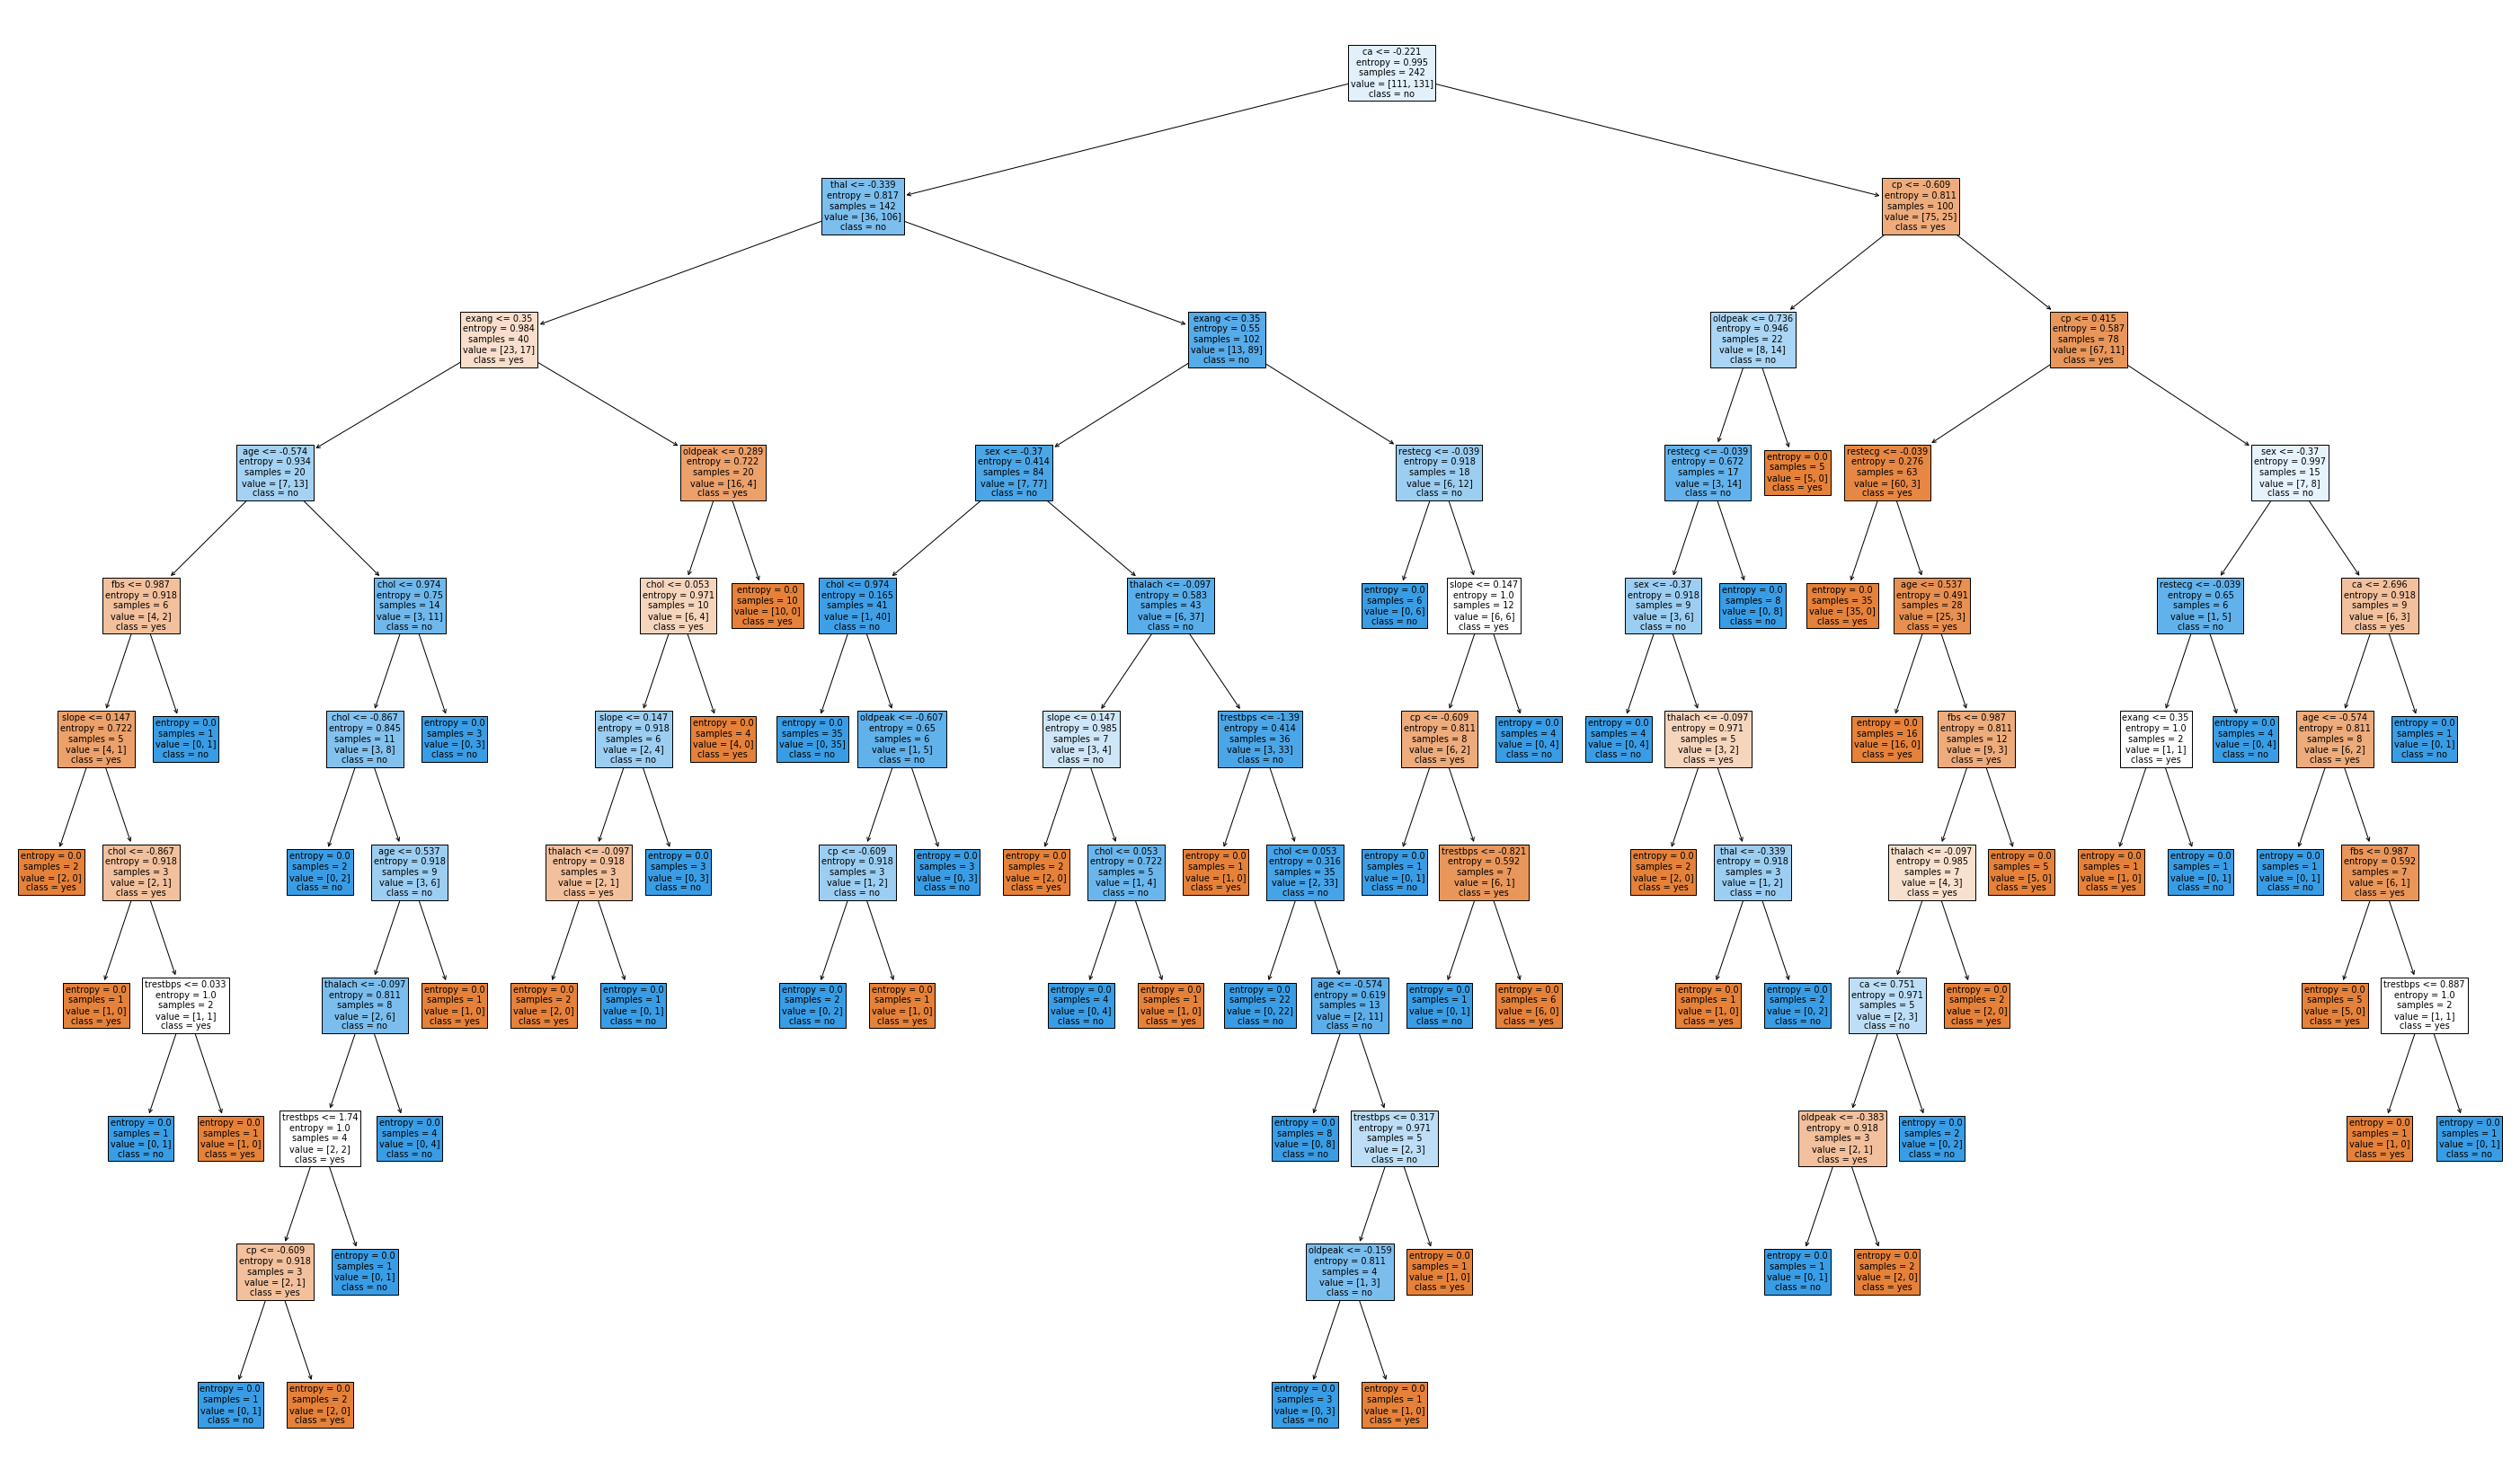

In [32]:
# from matplotlib.colors import ListedColormap

# X_set, y_set = scaler.inverse_transform(x_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
# plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('decision tree (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()


fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['yes', 'no']
from sklearn import tree

plt.figure(figsize=(50,30))
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names = cn,
               filled = True);
plt.savefig('tree1.jpg')

# #other methods:
# tree.export_graphviz(classifier,
#                      out_file="tree.dot",
#                      feature_names = fn, 
#                      class_names=cn,
#                      filled = True);

# plt.figure(figsize=(25,10))
# a = tree.plot_tree(classifier, 
#               feature_names=fn, 
#               class_names=cn, 
#               filled=True, 
#               rounded=True, 
#               fontsize=14)


<h1 style="font-size:30px;">Changing the decision tree's parameters:</h1>


<h1 style="font-size:20px;">#tree 2:</h1>


<h1 style="font-size:15px;">modeling the decision tree</h1>

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=0)
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


<h1 style="font-size:15px;">predicting the test set</h1>

In [37]:
y_pred2 = classifier2.predict(x_test)
np.concatenate((y_pred2.reshape(len(y_pred2), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1]])


<h1 style="font-size:15px;">Performance metrics</h1>

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

ac2 = accuracy_score(y_test, y_pred2)
ac2 #the correct predictions

[[17 10]
 [ 2 32]]


0.8032786885245902


<h1 style="font-size:15px;">Visualization</h1>

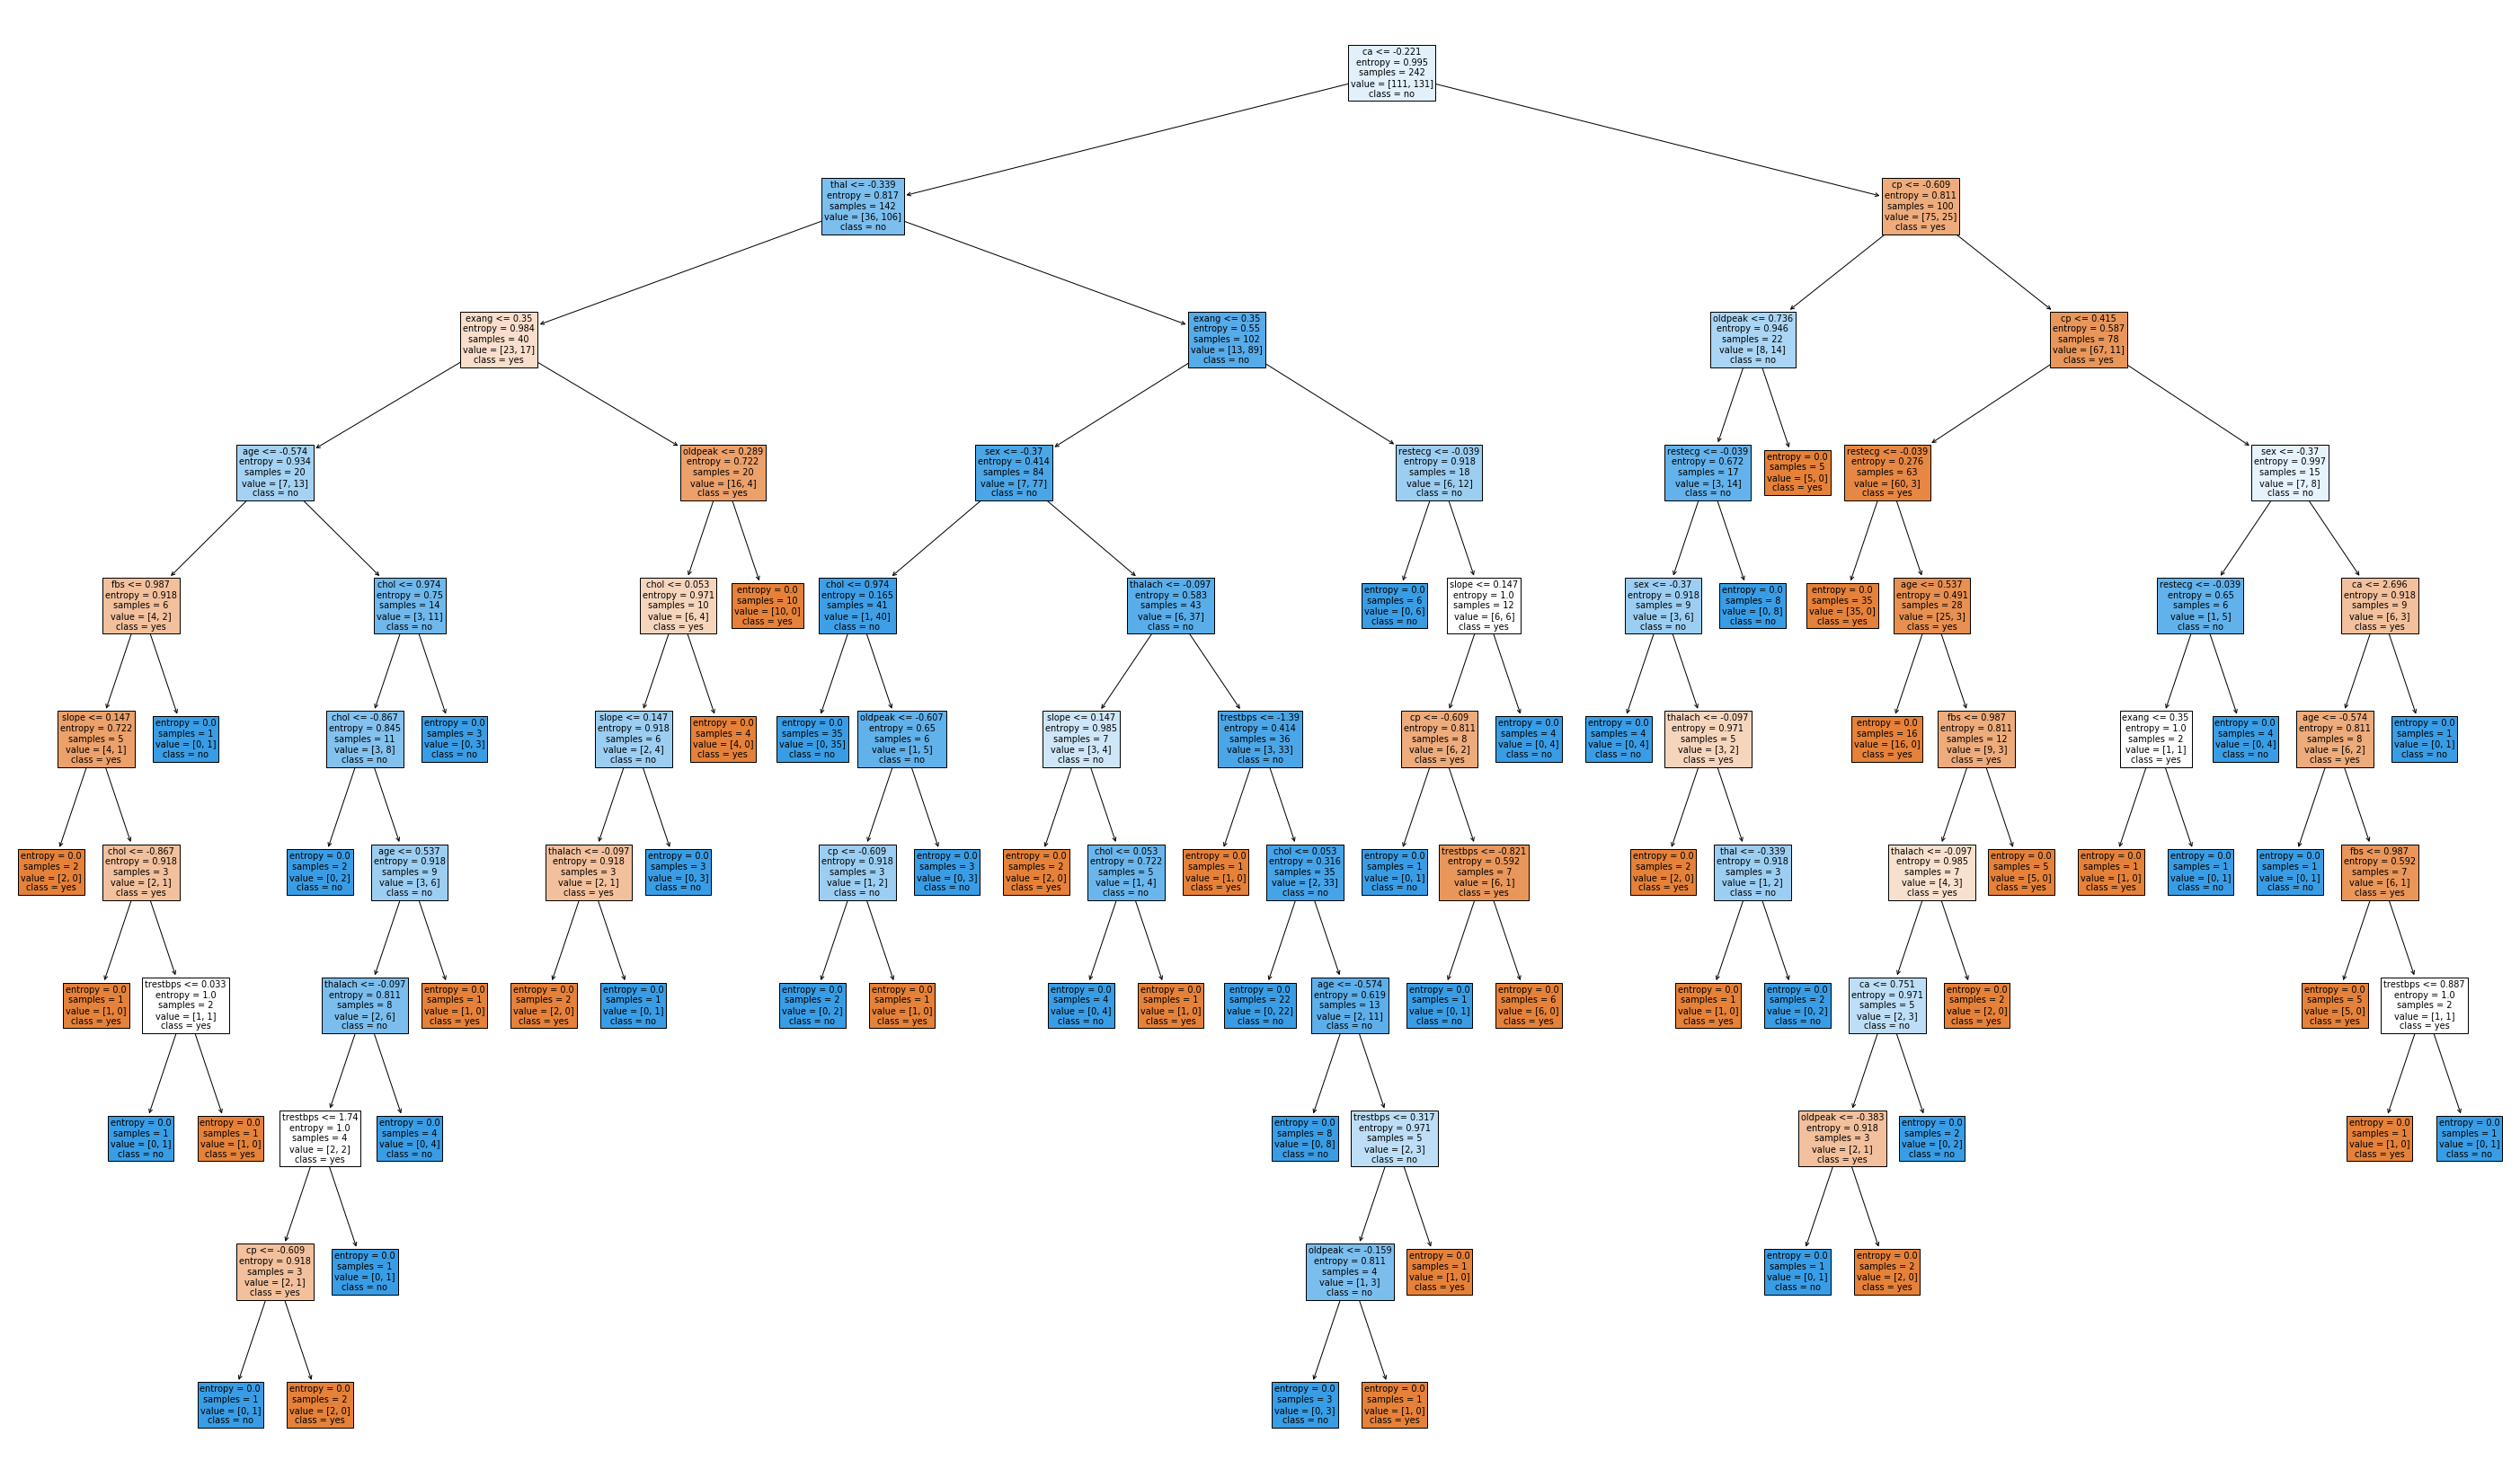

In [39]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['yes', 'no']
from sklearn import tree

plt.figure(figsize=(50,30))
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names = cn,
               filled = True);
plt.savefig('tree2.jpg')


<h1 style="font-size:20px;">#tree 3:</h1>

In [40]:
classifier3 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=100, random_state=0)
classifier3.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [41]:
y_pred3 = classifier3.predict(x_test)
np.concatenate((y_pred3.reshape(len(y_pred3), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [42]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

ac3 = accuracy_score(y_test, y_pred3)
ac3 #the correct predictions

[[22  5]
 [ 9 25]]


0.7704918032786885

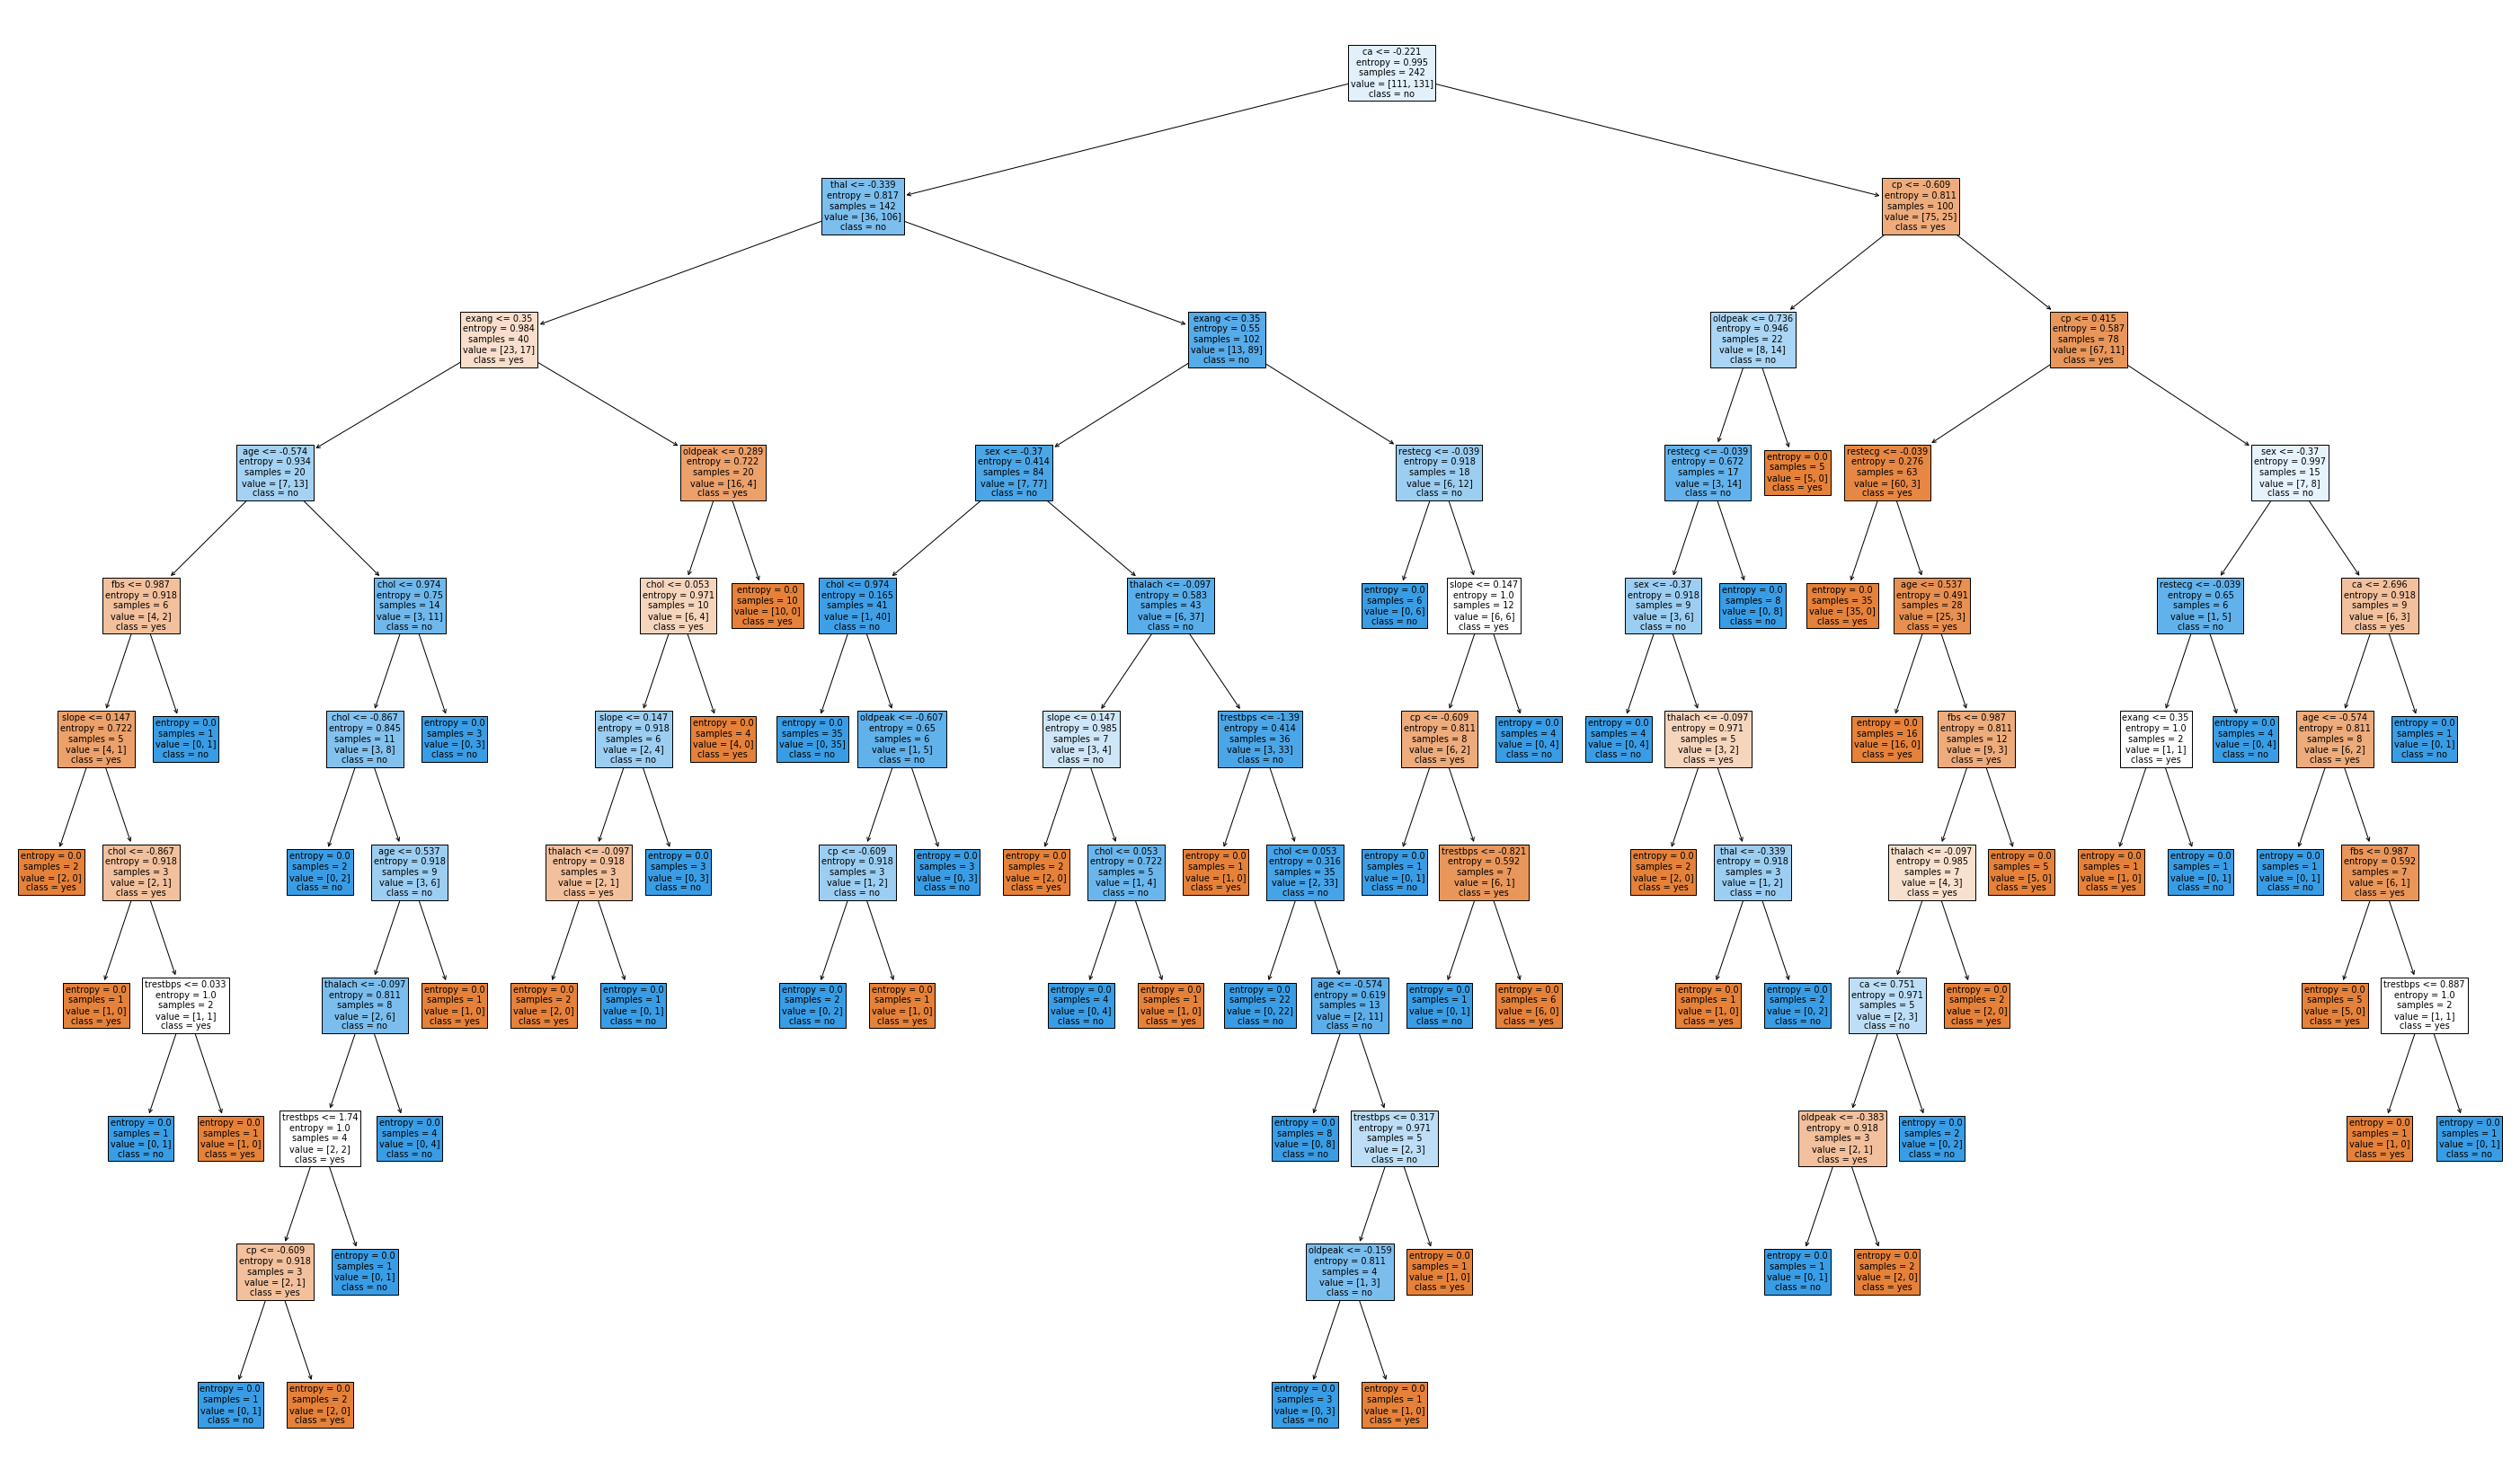

In [43]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['yes', 'no']
from sklearn import tree

plt.figure(figsize=(50,30))
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names = cn,
               filled = True);
plt.savefig('tree3.jpg')


<h1 style="font-size:20px;">#tree 4:</h1>

In [44]:
classifier4 = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, random_state=0)
classifier4.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [45]:
y_pred4 = classifier4.predict(x_test)
np.concatenate((y_pred4.reshape(len(y_pred4), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [46]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

ac4 = accuracy_score(y_test, y_pred4)
ac4 #the correct predictions

[[22  5]
 [ 3 31]]


0.8688524590163934

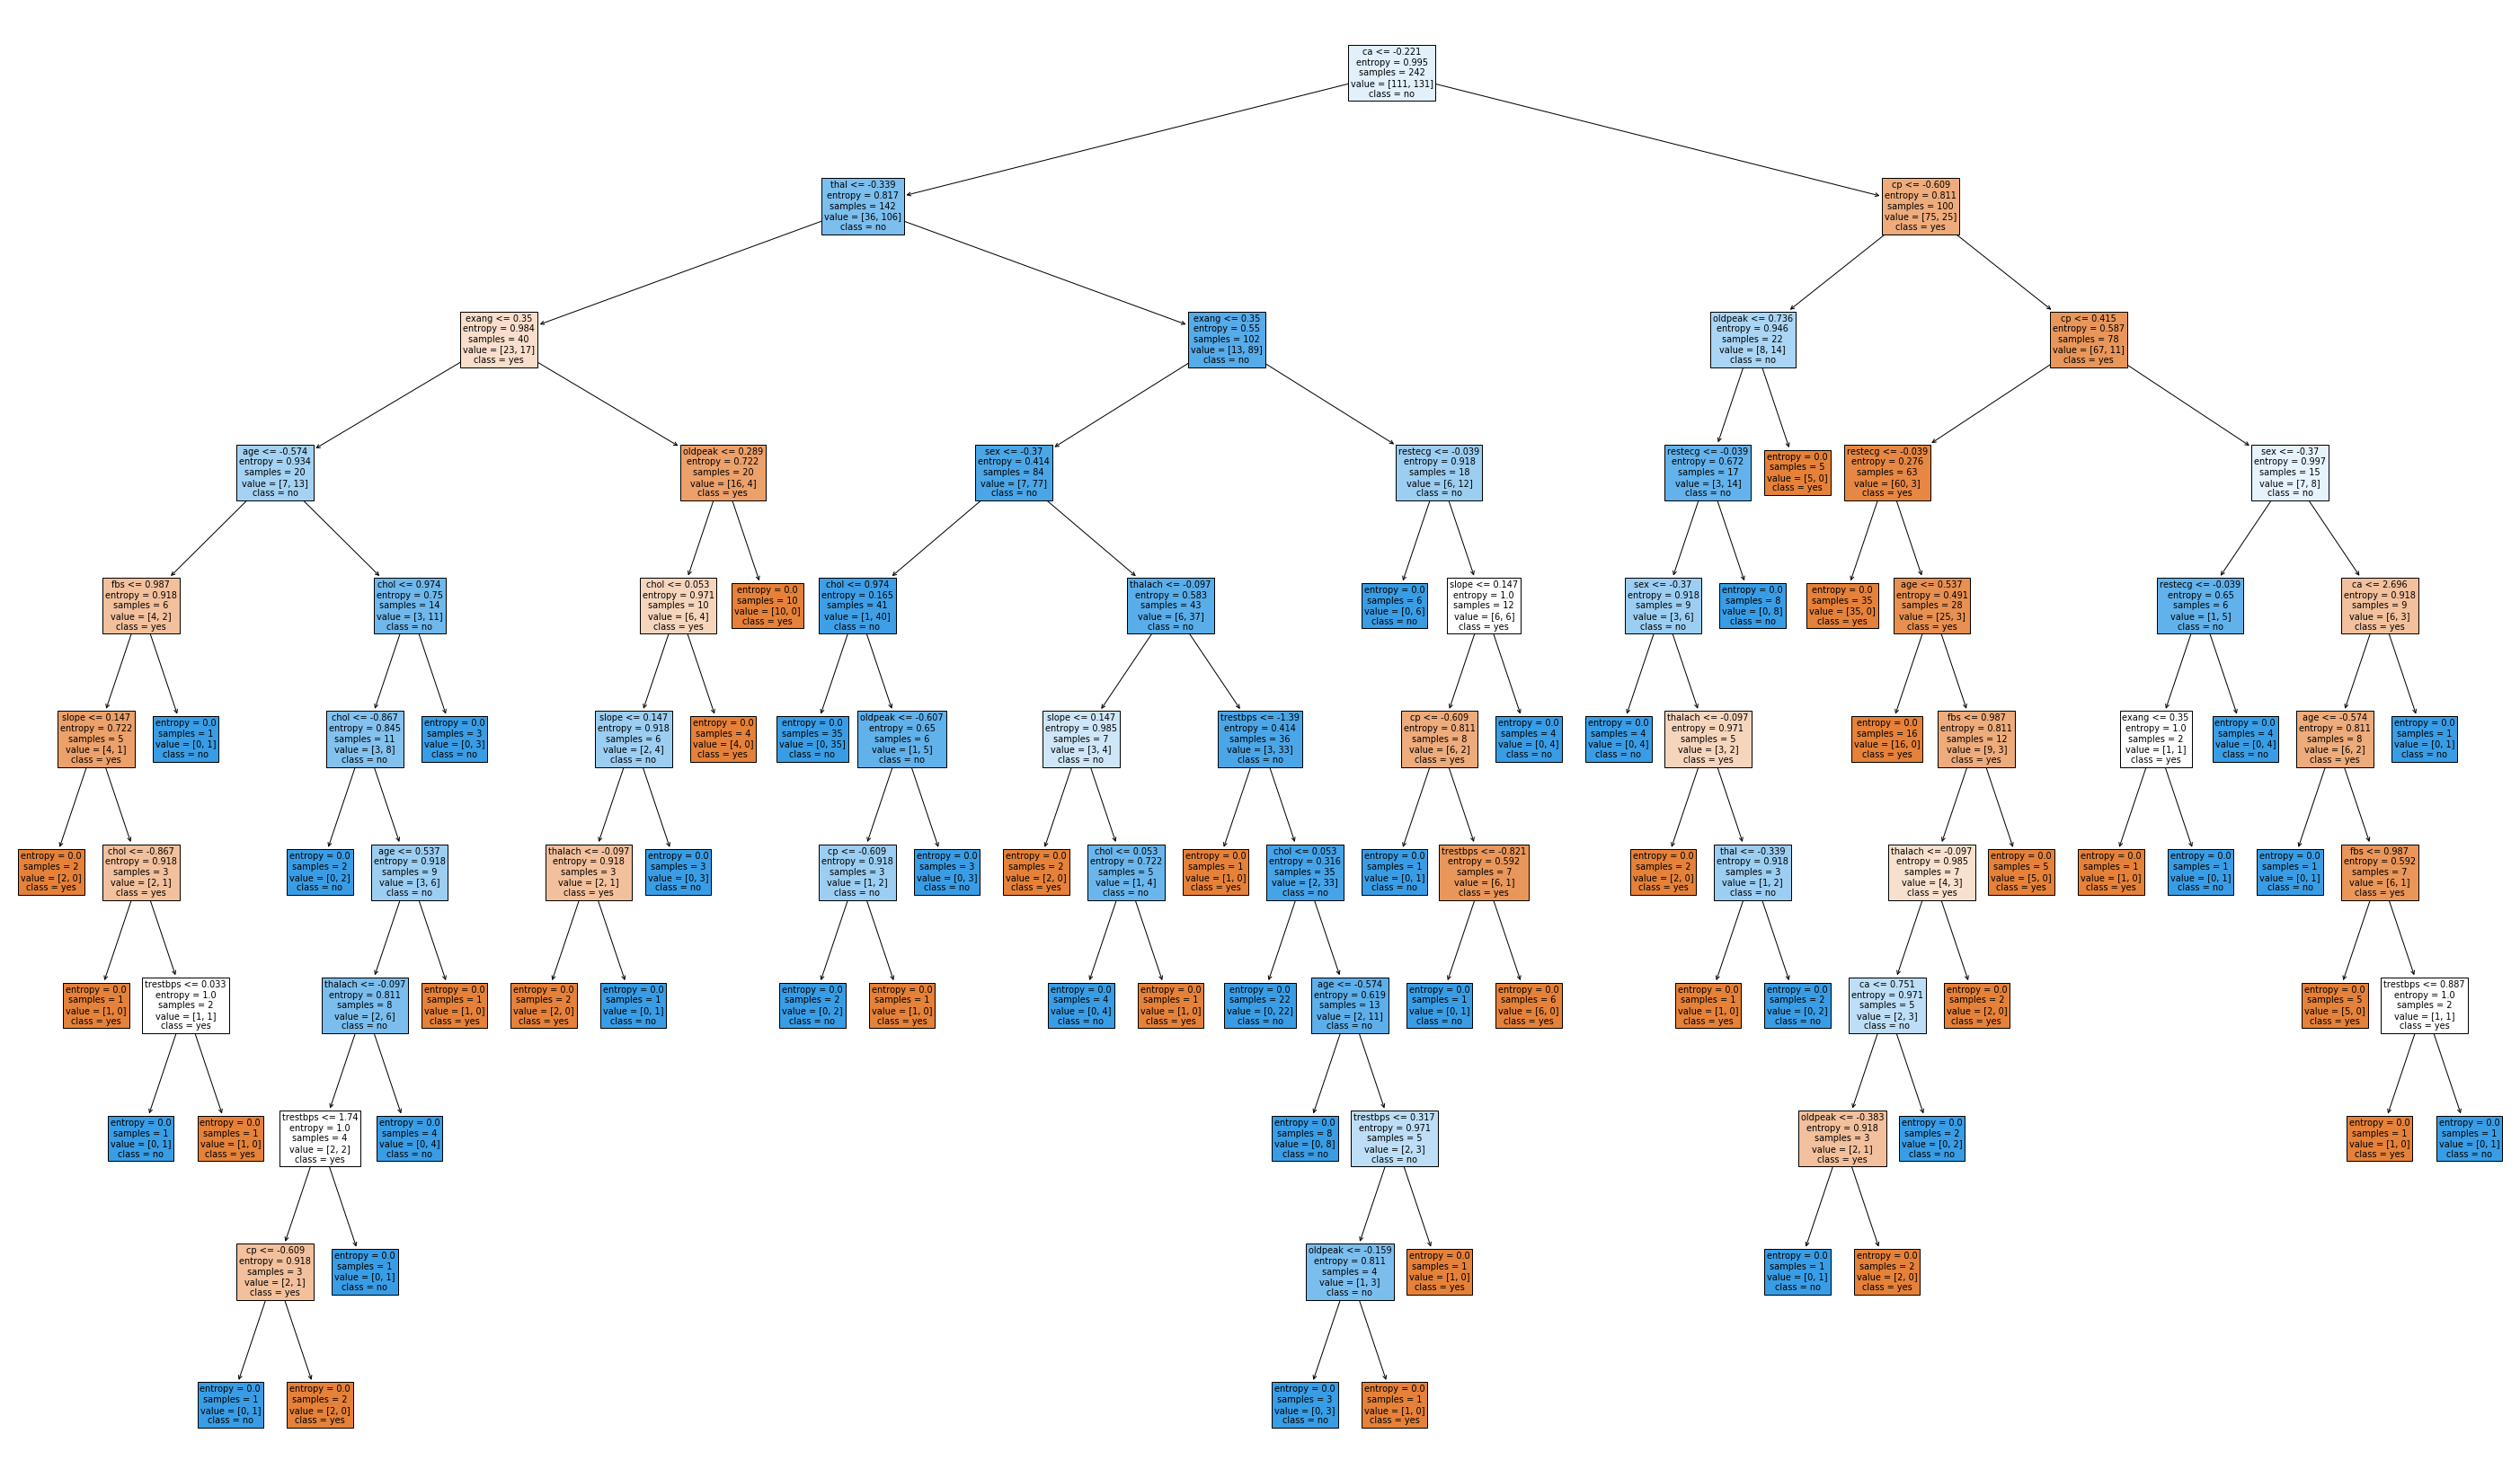

In [47]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['yes', 'no']
from sklearn import tree

plt.figure(figsize=(50,30))
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names = cn,
               filled = True);
plt.savefig('tree4.jpg')


<h1 style="font-size:20px;">#tree 5:</h1>

In [50]:
classifier5 = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=2, random_state=0)
classifier5.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
y_pred5 = classifier5.predict(x_test)
np.concatenate((y_pred5.reshape(len(y_pred5), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]])

In [52]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

ac5 = accuracy_score(y_test, y_pred5)
ac5 #the correct predictions

[[21  6]
 [ 8 26]]


0.7704918032786885

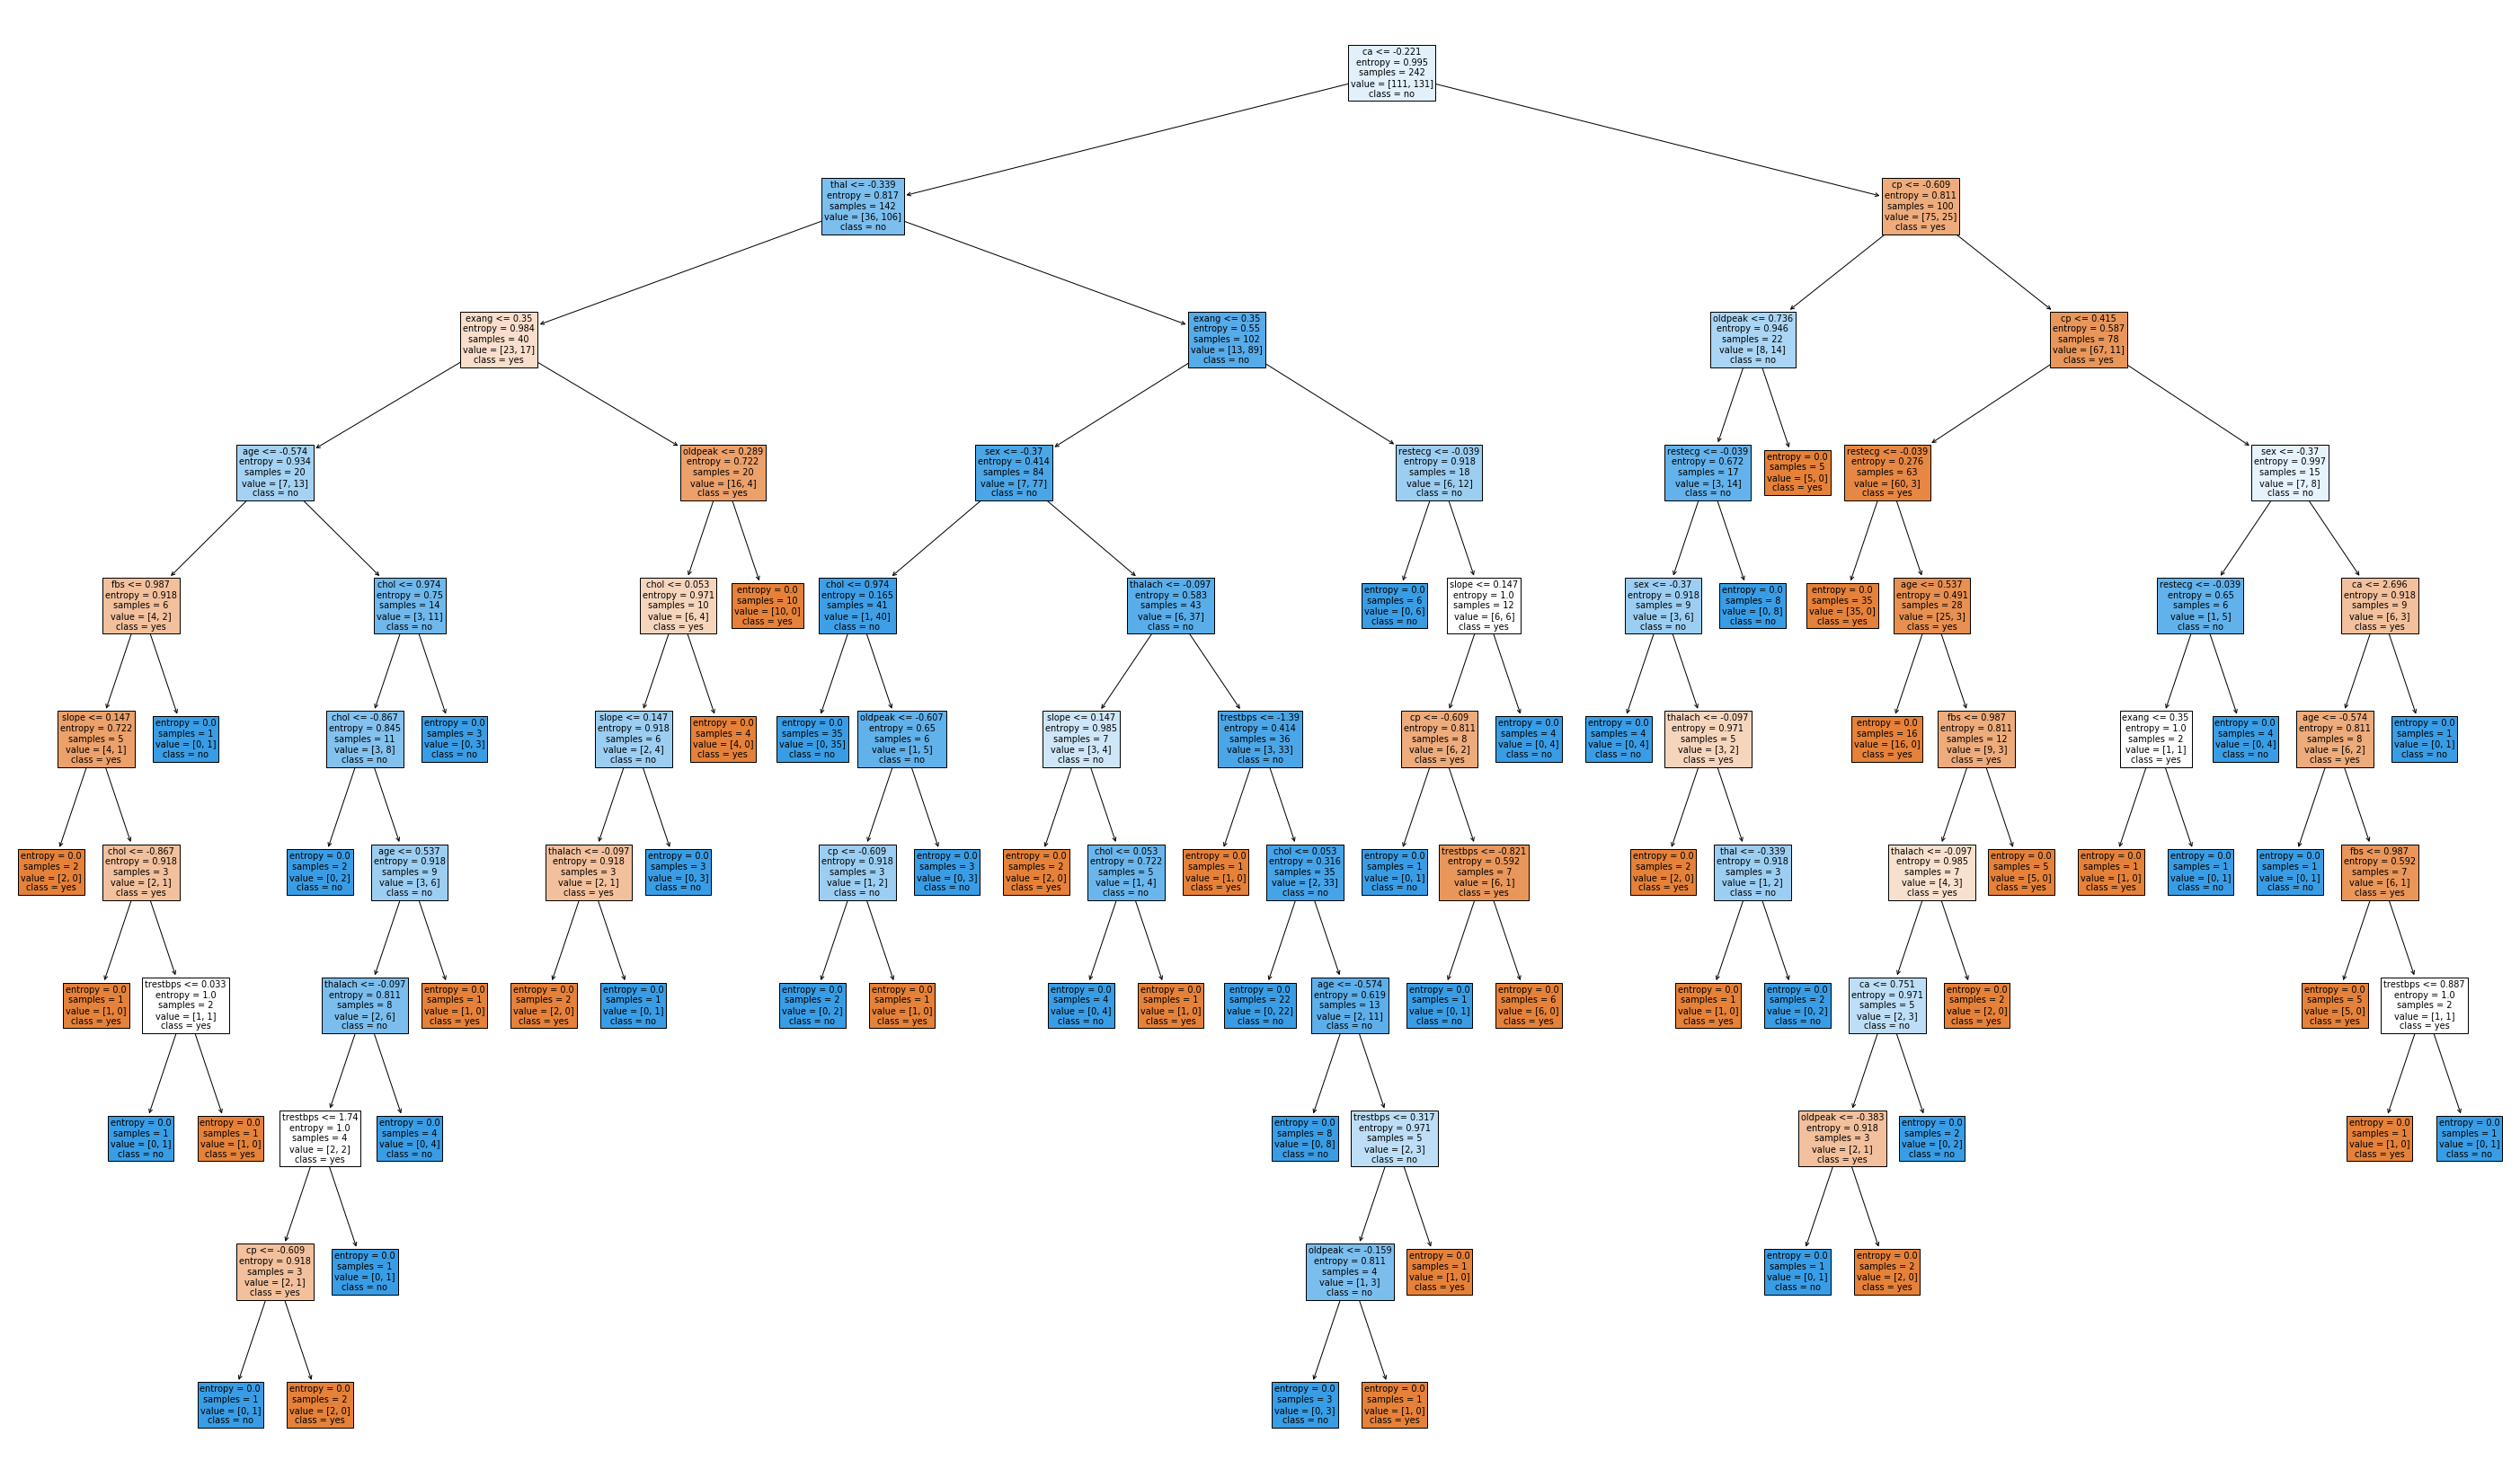

In [53]:
fn = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn = ['yes', 'no']
from sklearn import tree

plt.figure(figsize=(50,30))
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names = cn,
               filled = True);
plt.savefig('tree5.jpg')

In [239]:
#so the accuracy has improved from 77% to 80% by "DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2)".
#then I changed "min_samples_split=100", but accuracy became 77%, so changing "min_samples_split" does not drastically change the accuracy.
#then I changed "max_depth=20" (I also tried 100) and accuracy became 85%! so increasing the "max_depth" will probabely increase the accuracy.
#then I changed "criterian=entropy" and the accuracy became 77% again. 